# **MUSICS' GENRE CLASSIFICATION**


In [1]:
#From TensorFlow>2.5.0 the function Model.predic
!pip install TensorFlow==2.5

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
Root = "/content/drive/MyDrive/dataset/Data"
os.chdir(Root)

In [5]:
#os.makedirs('/content/spectrograms3sec')
#os.makedirs('/content/spectrograms3sec/train')
#os.makedirs('/content/spectrograms3sec/test')

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()
for g in genres:
  path_audio = os.path.join('/content/drive/MyDrive/dataset/Data/audio3sec',f'{g}')
  #os.makedirs(path_audio)
  path_train = os.path.join('/content/gdrive/My Drive/spectrograms3sec/train',f'{g}')
  path_test = os.path.join('/content/gdrive/My Drive/spectrograms3sec/test',f'{g}')
  #os. makedirs(path_train)
  #os. makedirs(path_test)

## We concetenated the 30 second file into 3 second here

In [ ]:
from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/dataset/Data/genres_original/',f"{g}")):

    song  =  os.path.join(f'/content/drive/MyDrive/dataset/Data/genres_original/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #print(i)
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'/content/drive/MyDrive/dataset/Data/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

## We did exact the file for Model 3 from Here only for easier of output



In [ ]:
for g in genres:
  j = 0
  print(g)
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/dataset/Data/audio3sec',f"{g}")):
    song  =  os.path.join(f'/content/drive/MyDrive/dataset/Data/audio3sec/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/dataset/Data/spectrograms3sec/test/{g}/{g+str(j)}.png')

import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

## We copy all files into train folder in this cell

In [ ]:
directory = "/content/gdrive/My Drive/spectrograms3sec/test/"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:100]

  for f in test_files:

    shutil.move(directory + f"{g}"+ "/" + f,"/content/gdrive/My Drive/spectrograms3sec/train/" + f"{g}")


In [8]:
audio_dataset_path='/content/drive/MyDrive/dataset/Data/audio3sec'
metadata=pd.read_csv('/content/drive/MyDrive/dataset/Data/audio3sec/features_3_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues10.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues11.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues12.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues13.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues14.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
with tf.device('/device:GPU:0'):
  extracted_features=[]
  for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))    
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

1357it [07:08,  3.07it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1358it [07:08,  2.13it/s]

Error: 


9990it [39:18,  4.24it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-227.82014, 157.88956, 5.621353, 25.875154, 7...",blues
1,"[-217.48514, 158.84308, -2.4046838, 31.076023,...",blues
2,"[-218.46448, 164.7398, 0.6411452, 24.85649, 4....",blues
3,"[-196.74341, 150.91875, 8.372801, 28.600815, -...",blues
4,"[-196.39543, 146.37524, 2.3922293, 21.718582, ...",blues


In [13]:
extracted_features_df['class'].value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
hiphop        998
rock          998
classical     997
country       997
Name: class, dtype: int64

**# Split the dataset into independent and dependent dataset**

In [14]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(9989, 40)

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y.shape

(9989, 10)

**Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-9.86666107e+01,  6.65021973e+01,  3.53861122e+01, ...,
         1.07659325e-01, -1.23824131e+00, -2.97182012e+00],
       [-4.75722084e+01,  1.10487114e+02, -9.08154392e+00, ...,
         5.01563311e-01,  1.76592159e+00, -2.21988845e+00],
       [-1.60263733e+02,  9.23149796e+01,  1.07087708e+01, ...,
        -1.65201807e+00, -2.49871516e+00, -8.08512592e+00],
       ...,
       [-2.44029865e+01,  6.17069550e+01,  3.43970442e+00, ...,
        -4.24983931e+00,  6.62241280e-01, -2.40459776e+00],
       [-9.12848282e+01,  1.14458008e+02, -2.93077793e+01, ...,
        -7.76490867e-01,  3.50615692e+00,  3.53638434e+00],
       [-1.71176987e+02,  1.58066315e+02, -2.46109600e+01, ...,
        -1.08679352e+01, -8.99083805e+00,  4.01445293e+00]], dtype=float32)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7991, 40)
(1998, 40)
(7991, 10)
(1998, 10)


# MODEL TRAINING

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf

In [22]:
### No of classes
num_labels=y.shape[1]

In [23]:
y.shape[1]

10

In [24]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))


###final layer
model.add(Dense(num_labels, activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              41984     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adamax')

In [27]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

In [28]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 32
with tf.device('/device:GPU:0'):
  checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5', 
                               verbose=1, save_best_only=True)
  start = datetime.now()
  history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


  duration = datetime.now() - start
  print("Training completed in time: ", duration)

Epoch 1/150
250/250 [==============================] - 4s 7ms/step - loss: 2.5707 - accuracy: 0.1417 - val_loss: 2.1097 - val_accuracy: 0.2503

Epoch 00001: val_loss improved from inf to 2.10973, saving model to saved_models/audio_classification_10:11:14.hdf5
Epoch 2/150
250/250 [==============================] - 1s 6ms/step - loss: 2.1609 - accuracy: 0.2075 - val_loss: 1.9587 - val_accuracy: 0.3078

Epoch 00002: val_loss improved from 2.10973 to 1.95874, saving model to saved_models/audio_classification_10:11:14.hdf5
Epoch 3/150
250/250 [==============================] - 1s 6ms/step - loss: 2.0251 - accuracy: 0.2718 - val_loss: 1.7936 - val_accuracy: 0.3804

Epoch 00003: val_loss improved from 1.95874 to 1.79365, saving model to saved_models/audio_classification_10:11:14.hdf5
Epoch 4/150
250/250 [==============================] - 2s 6ms/step - loss: 1.8854 - accuracy: 0.3162 - val_loss: 1.6952 - val_accuracy: 0.3644

Epoch 00004: val_loss improved from 1.79365 to 1.69515, saving model

In [29]:
model.evaluate(X_test,y_test,verbose=0)

[0.3992155194282532, 0.923923909664154]

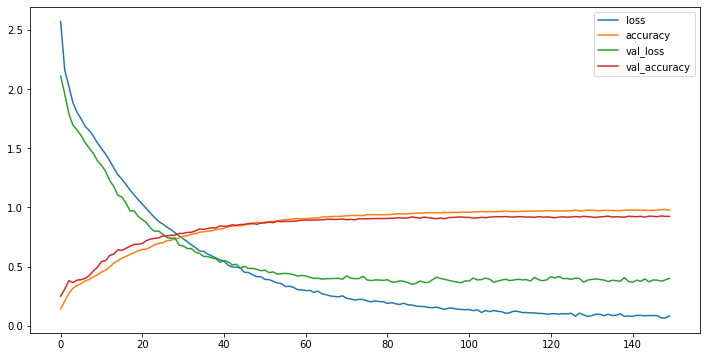

In [30]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [31]:
model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 9, 3, ..., 5, 6, 8])

In [32]:
filename= "/content/drive/MyDrive/dataset/Data/Test_audio/Jump-Around_JKSGB-ZMzTU.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[  9.753618    82.49931    -16.450853    29.127092    -5.7575164
  19.375505    -8.292601    15.150669    -8.079973    17.153458
  -6.770461    11.973786    -7.5982504    9.422225    -7.3153443
   7.264704    -7.9177747    3.610014    -6.8417697    5.4499326
  -4.8122063    4.692828    -3.4904563    2.5217721   -1.9015193
   2.2441335   -3.317784     3.4899971   -0.35714617   3.391402
  -2.3626838   -0.6577446   -2.6911075    1.0892121   -1.938498
  -1.4911789   -3.7739813   -1.3837504   -2.6238277   -1.0588251 ]
[[  9.753618    82.49931    -16.450853    29.127092    -5.7575164
   19.375505    -8.292601    15.150669    -8.079973    17.153458
   -6.770461    11.973786    -7.5982504    9.422225    -7.3153443
    7.264704    -7.9177747    3.610014    -6.8417697    5.4499326
   -4.8122063    4.692828    -3.4904563    2.5217721   -1.9015193
    2.2441335   -3.317784     3.4899971   -0.35714617   3.391402
   -2.3626838   -0.6577446   -2.6911075    1.0892121   -1.938498
   -1.4911789   -3.773

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['metal'], dtype='<U9')

In [33]:
filename= "/content/drive/MyDrive/dataset/Data/Test_audio/slipknot-psychosocial-official-video-_mp3convert.org_-_1_.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[ -5.563918    77.18656    -21.24149     40.914944    -7.433117
  22.282171   -10.364257    19.049095   -11.130689    11.937774
 -10.26192     13.772153    -7.136029     6.185648   -10.239596
   7.693042    -9.85925      4.8032026   -6.4695997    5.110403
  -9.549495     2.1758633   -4.705404     1.3019085   -6.5057783
   0.5128285   -6.2879124    0.45568138  -4.990284     0.16446592
  -5.6449785   -0.09309648  -4.101492    -0.28704342  -2.0551212
  -0.34217677  -2.775112    -1.1914726   -4.662791    -0.84007484]
[[ -5.563918    77.18656    -21.24149     40.914944    -7.433117
   22.282171   -10.364257    19.049095   -11.130689    11.937774
  -10.26192     13.772153    -7.136029     6.185648   -10.239596
    7.693042    -9.85925      4.8032026   -6.4695997    5.110403
   -9.549495     2.1758633   -4.705404     1.3019085   -6.5057783
    0.5128285   -6.2879124    0.45568138  -4.990284     0.16446592
   -5.6449785   -0.09309648  -4.101492    -0.28704342  -2.0551212
   -0.34217677  -2.775

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['metal'], dtype='<U9')